In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from dotenv import load_dotenv, find_dotenv

In [108]:
PROJECT_DIR = find_dotenv().split('.')[0]
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
RAW_DATA_DIR = os.path.join(DATA_DIR, 'raw')
PROC_DATA_DIR = os.path.join(DATA_DIR, 'processed')

In [109]:
os.listdir(RAW_DATA_DIR)

['california_covid-19-cases.csv', 'newyork_covid-19-cases.csv']

In [129]:
# import data

newyork = pd.read_csv(os.path.join(RAW_DATA_DIR, 'newyork_covid-19-cases.csv'))
cali = pd.read_csv(os.path.join(RAW_DATA_DIR, 'california_covid-19-cases.csv'))

In [130]:
# take a peek at the dataframe
newyork.head(3)

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,04/15/2020,Albany,33,581,301,6163
1,04/15/2020,Allegany,0,28,8,312
2,04/15/2020,Bronx,1279,25932,2939,51053


In [131]:
# take a peek at the dataframe
cali.head(3)

,County Name,Most Recent Date,Total Count Confirmed,Total Count Deaths,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients
0,Los Angeles,4/1/2020,3502.0,66.0,739.0,1332.0,335.0,220.0
1,San Bernardino,4/1/2020,245.0,5.0,95.0,196.0,39.0,52.0
2,Orange,4/1/2020,579.0,11.0,117.0,221.0,50.0,48.0


In [134]:
# Rename date columns
cali = cali.rename(columns={'Most Recent Date':'date',
                           'Total Count Confirmed': 'total_conf',
                           'Total Count Deaths':'total_dead'})
newyork = newyork.rename(columns={'Test Date':'date',
                                 'Cumulative Number of Positives':'total_pos'})

In [135]:
# Make date field into datetime
cali.loc[:, 'date'] = pd.to_datetime(cali.date, format='%m/%d/%Y')
newyork.loc[:, 'date'] = pd.to_datetime(newyork.date, format='%m/%d/%Y')

In [116]:
cali.head(3)

,County Name,date,total_conf,total_dead,COVID-19 Positive Patients,Suspected COVID-19 Positive Patients,ICU COVID-19 Positive Patients,ICU COVID-19 Suspected Patients
0,Los Angeles,2020-04-01,3502.0,66.0,739.0,1332.0,335.0,220.0
1,San Bernardino,2020-04-01,245.0,5.0,95.0,196.0,39.0,52.0
2,Orange,2020-04-01,579.0,11.0,117.0,221.0,50.0,48.0


In [120]:
# Identify date ranges 
dfs = {'names': ['CA', 'NY'], 
       'dframes': [cali, newyork]}
for ind, df in enumerate(dfs['dframes']):
    print(dfs['names'][ind], 'dates reported:', 
          df.date.min(), 'to', df.date.max())

CA dates reported: 2020-04-01 00:00:00 to 2020-04-14 00:00:00
NY dates reported: 2020-03-02 00:00:00 to 2020-04-15 00:00:00


CA only has two weeks of reporting  
NY has about a month and a half

In [121]:
# Create aggregate data 

ny_confirmed = newyork.groupby('date').total_pos.sum().reset_index()
ca_confirmed = cali.groupby('date').total_conf.sum().reset_index()

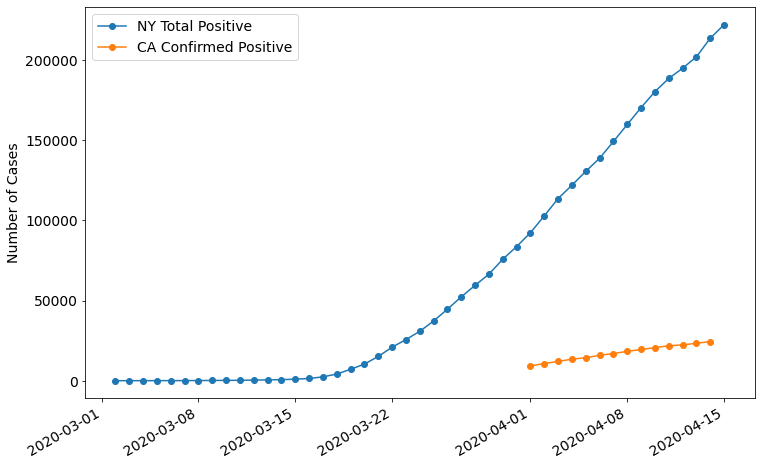

In [132]:
# Visualize cumulative confirmed cases - Comparing NY and CA

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
plt.plot(ny_confirmed.date, ny_confirmed.total_pos, '-o')
plt.plot(ca_confirmed.date, ca_confirmed.total_conf, '-o')
plt.legend(['NY Total Positive', 'CA Confirmed Positive'])
plt.ylabel('Number of Cases')
plt.gcf().autofmt_xdate()

plt.show()

In [162]:
# Create aggregate data 
alameda = cali[cali['County Name'] == 'Alameda']
sf = cali[cali['County Name'] == 'San Francisco']
marin = cali[cali['County Name'] == 'Marin']
napa = cali[cali['County Name'] == 'Napa']
sonoma = cali[cali['County Name'] == 'Sonoma']
solano = cali[cali['County Name'] == 'Solano']
contracosta = cali[cali['County Name'] == 'Contra Costa']
santaclara = cali[cali['County Name'] == 'Santa Clara']
sanmateo = cali[cali['County Name'] == 'San Mateo']

cali_counties = {'counties': ['Alameda',
                'San Francisco',
                'Marin', 
                'Napa', 
                'Sonoma', 
                'Solano', 
                'Contra Costa', 
                'Santa Clara',
                'San Mateo'],
'dframes': [alameda, 
            sf, 
            marin, 
            napa, 
            sonoma, 
            solano, 
            contracosta, 
            santaclara,
           sanmateo],
'population':[1671329, 881549, 258826, 137744, 
             494336, 447643, 1153526, 1927852,
             766573]}

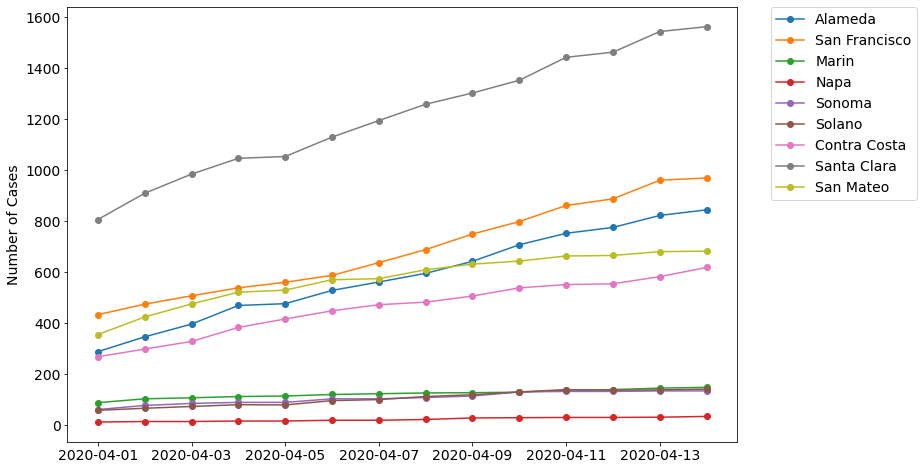

In [163]:
# Visualize cumulative confirmed cases - Bay Area Counties

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
for df in cali_counties['dframes']:
    plt.plot(df.date, df.total_conf, '-o')
plt.legend(cali_counties['counties'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Cases')

plt.show()

#### What if we normalize to total people? 

Source: https://www.census.gov/quickfacts/


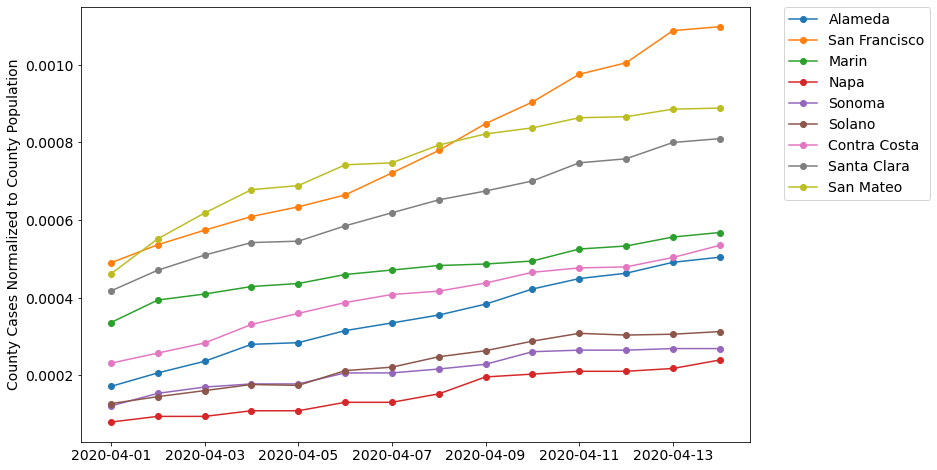

In [166]:
# Visualize cumulative confirmed cases - Bay Area counties normalized to county population

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
for ind, df in enumerate(cali_counties['dframes']):
    plt.plot(df.date, df.total_conf/cali_counties['population'][ind], '-o')
plt.legend(cali_counties['counties'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('County Cases Normalized to County Population')

plt.show()

In [177]:
# If we approximate these curves as straight lines, what is the slope, 
# or rate of change, in covid cases during this time?

slopes = []
for ind, df in enumerate(cali_counties['dframes']):
    slopes.append((df.total_conf.iloc[-1] - 
                   df.total_conf.iloc[0])/len(df.total_conf))

norm_slopes = []
for ind, df in enumerate(cali_counties['dframes']):
    norm_slopes.append(((df.total_conf.iloc[-1] - 
                         df.total_conf.iloc[0])/len(
                df.total_conf))/cali_counties['population'][ind])


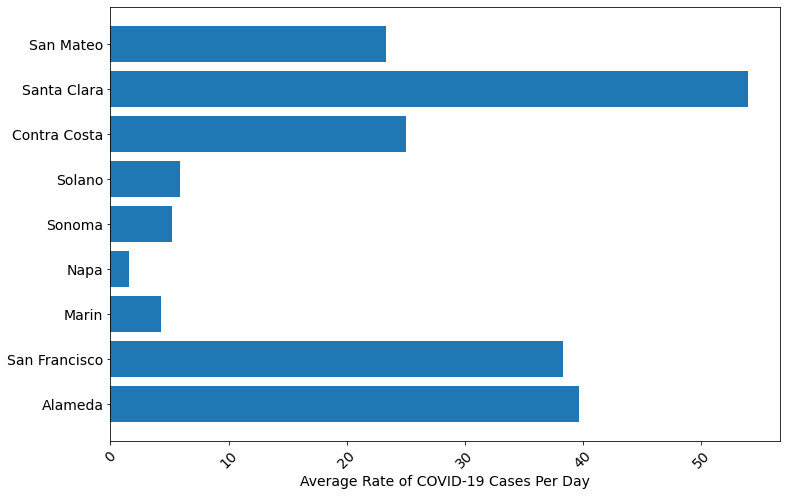

In [192]:
# Visualize the rates of change in covid cases by Bay Area county

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
plt.barh(cali_counties['counties'], 
        width=slopes)
plt.xticks(rotation=45)

# plt.legend(cali_counties['counties'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Average Rate of COVID-19 Cases Per Day')

plt.show()

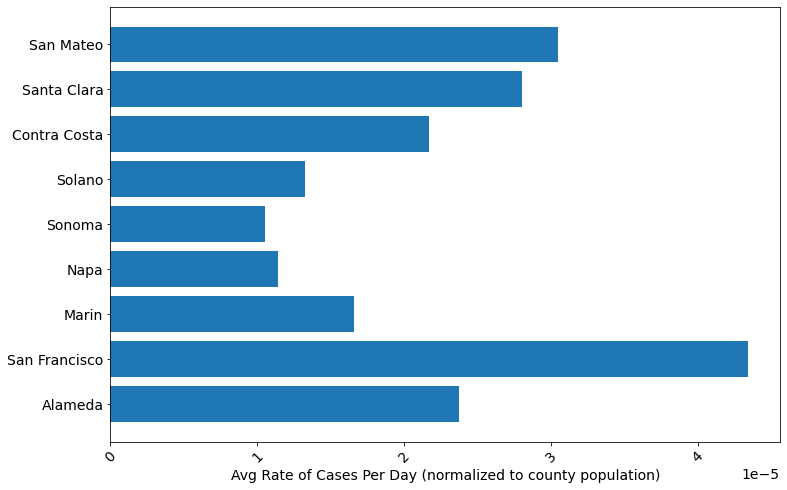

In [193]:
# Visualize the rates of change in covid cases by Bay Area county - Normalized to county population

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
plt.barh(cali_counties['counties'], 
        width=norm_slopes)
plt.xticks(rotation=45)

plt.xlabel('Avg Rate of Cases Per Day (normalized to county population)')

plt.show()